# Effect of AC-coupling on a squarewave

## Configuration

We simulate the effect of a RC circuit composed by a resistor of 50kOhms and a capacitor of 1uF on a 20Hz square wave.

## Plots

In [1]:
import matplotlib.pyplot as pp
import numpy as np
import scipy.fftpack

from utils import show, waves

# square = waves.get_squarewave(a, f, t)
# discharge = waves.get_periodic_RC_discharge(R, C, t, f)

# fig2, (wave, disch, result) = pp.subplots(nrows=3, ncols=1, figsize=(10, 10))

# show.plot(t, square, wave, "%rHz Square wave" % f)
# show.plot(t, discharge, disch, "Capacitor discharge", ymin=-0.05, ymax=1.05)
# show.plot(t, square * discharge, result, "Square wave affected by the capacitor discharge")

def plot_AC_coupling_graphs(R, C, a, f, periods):
    p = 1.0 / f   # period, s
    samples = 10240                   # Number of samplepoints
    spacing = p * periods / samples   # sample spacing; must be smaller than 1/(2 * max_freq)
    t = np.linspace(0.0, samples * spacing, samples, endpoint=False)   # Return evenly spaced numbers over a specified interval.
    square = waves.get_squarewave(a, f, t)
    discharge = waves.get_periodic_RC_discharge(R, C, t, f)
    
    fig2, (wave, disch, result) = pp.subplots(nrows=3, ncols=1, figsize=(10, 10))

    show.plot(t, square, wave, "%rHz Square wave" % f)
    show.plot(t, discharge, disch, "Capacitor discharge", ymin=-0.05, ymax=1.05)
    show.plot(t, square * discharge, result, "Square wave affected by the capacitor discharge")

    fig3, ((fft11, fft12), (fft21, _)) = pp.subplots(nrows=2, ncols=2, figsize=(16, 12))
    show.plot_fft(square, f, periods, fft11, 'Pure squarewave FFT')

    show.plot_fft(square * discharge, f, periods, fft12, 'Squarewave + capacitor discharge FFT')
    show.plot_fft(square, f, periods, fft21, 'comparison')
    show.plot_fft(square * discharge, f, periods, fft21, 'comparison')
    show.plot_fft_diff(square, square * discharge, f, periods, _, 'comparison')    
    
plot_AC_coupling_graphs(200.0e3, 1e-6, 1, 20, 2)    

## FFT

In [2]:
# from utils import show    
    
# fig3, ((fft11, fft12), (fft21, _)) = pp.subplots(nrows=2, ncols=2, figsize=(16, 12))
# fig3.delaxes(_)    
    
# xf = scipy.fft.fftfreq(samples, spacing)[:samples//2]

# show.plot_fft(xf, square, fft11, 'Pure squarewave FFT')
# show.plot_fft(xf, square, fft11, 'Pure squarewave FFT')
# show.plot_fft(xf, square * discharge, fft12, 'Squarewave + capacitor discharge FFT')
# show.plot_fft(xf, square, fft21, 'comparison')
# show.plot_fft(xf, square * discharge, fft21, 'comparison')
# show.plot_fft_diff(xf, square, square * discharge, _, 'comparison')

## Change the RC values:

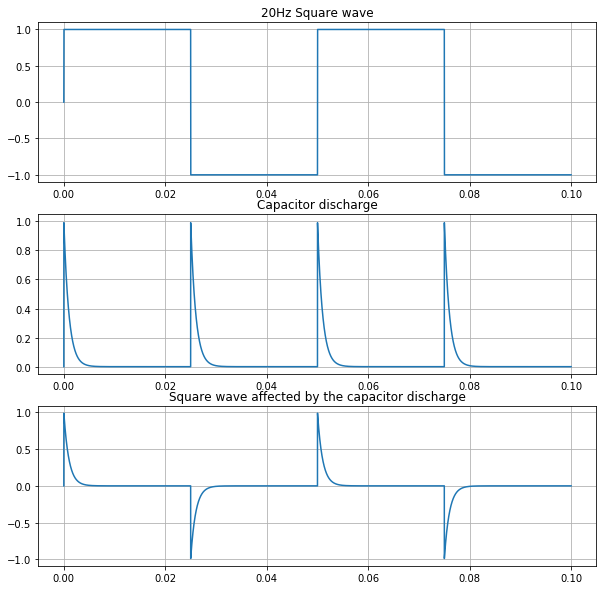

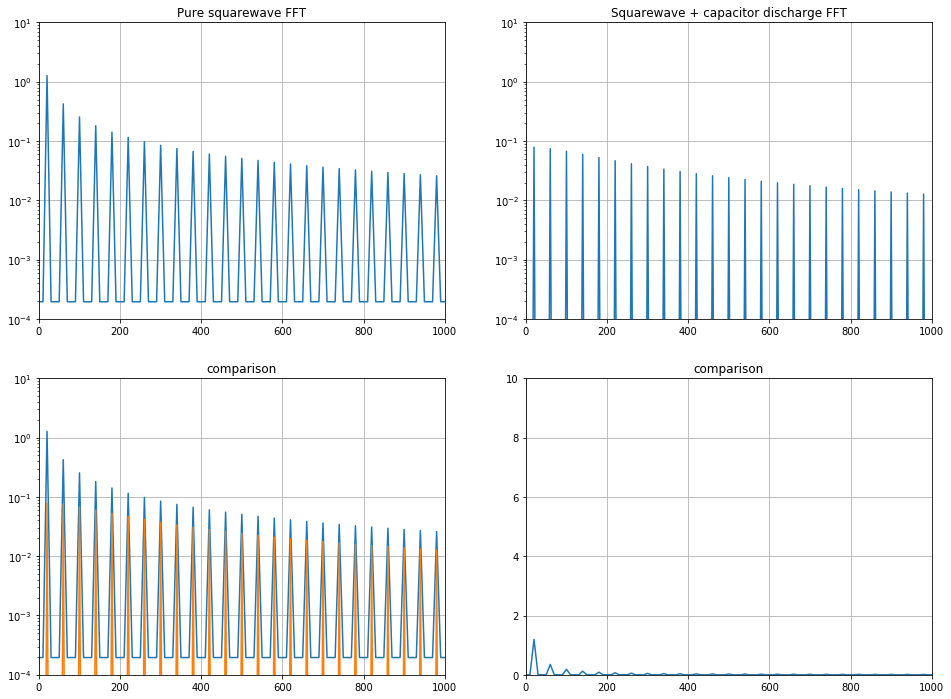

In [3]:
# R = 1.0e3    # 1 kOhms
# C = 1.0e-6   # 1 uF

# # square = get_squarewave(a, f, t)
# discharge = get_RC_discharge(R, C, t)

# plot_AC_coupling_graphs(200.0e3, 1e-6, 1, 20, 2)    

plot_AC_coupling_graphs(1.0e3, 1e-6, 1, 20, 2)    

In [4]:
# def plot_fft(x, f, axes, title=''):
#     y = scipy.fft.fft(f)
#     samples = len(y)
#     axes.semilogy(x, 2.0/samples * np.abs(y[0:samples//2]))
#     axes.set_xlim(left=0, right=1000)
#     axes.set_ylim(10e-5, 10)
#     axes.set_title(title)
#     axes.grid(True)
    
# fig4, ((fft11, fft12), (fft21, _)) = pp.subplots(nrows=2, ncols=2, figsize=(16, 12))
    
# xf = scipy.fft.fftfreq(samples, spacing)[:samples//2]

# plot_fft(xf, square, fft11, 'Pure squarewave FFT')
# plot_fft(xf, square * discharge, fft12, 'Squarewave + capacitor discharge FFT')
# plot_fft(xf, square, fft21, 'comparison')
# plot_fft(xf, square * discharge, fft21, 'comparison')
# plot_fft_diff(xf, square, square * discharge, _, 'comparison')